# Prediction of the water Salinity depending on its Temperature.
source of datset: https://www.kaggle.com/datasets/sohier/calcofi
T_degC temperature in degree Celsius,  Salnty salinity in g of salt per kg of water (g/kg).

In [125]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import random

In [126]:
data= pd.read_csv('/Users/imac/Downloads/bottle.csv')
#data.info()
pd.set_option('display.max.columns', 75)
pd.set_option('display.max.rows', 200)
#data.describe()

df = data[['Salnty', 'T_degC']]
df.head()


,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


Interquartile Rrange: 6.200000000000001 
Range: 29.7


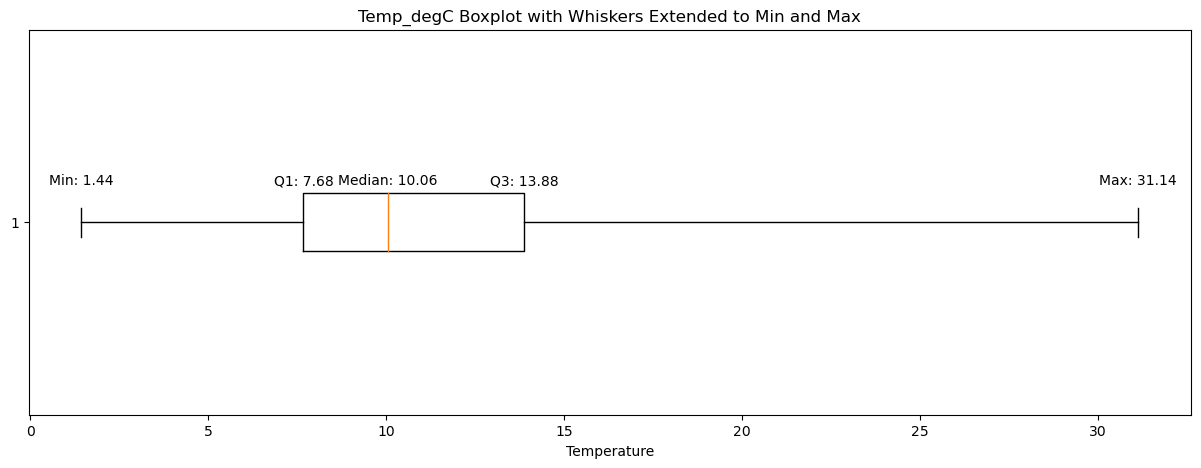

In [127]:
# median of Temperature
df.dropna(subset=['T_degC'], inplace=True)  # Remove rows with NaN in the 'T_degC' column
median_temperature = np.median(df['T_degC'])

# Q1 and Q3 of Temperature
Q1 = np.percentile(df['T_degC'],25)
Q3 = np.percentile(df['T_degC'],75)

# min and max
lowest = min(df['T_degC'])
highest = max(df['T_degC'])

range_temp = highest - lowest # range
interquartile_range = Q3 - Q1 # interquartile range

print('Interquartile Rrange: ' + str(interquartile_range), '\nRange: ' + str(range_temp))

# Temp_degC boxplot 
boxplot_data = [lowest, Q1, median_temperature, Q3, highest]

plt.figure(figsize=(15,5))

plt.boxplot(boxplot_data, vert=False, whis=range_temp) 
plt.title('Temp_degC Boxplot with Whiskers Extended to Min and Max')
plt.xlabel('Temperature')

for value, label in zip(boxplot_data, ['Min', 'Q1', 'Median', 'Q3', 'Max']):
    plt.text(value, 1.09, f'{label}: {value}', va='bottom', ha='center')
    
plt.show()


Interquartile Rrange: 0.71 
Range: 8.603 
Median: 33.87 
Q1: 33.49 
Q3: 34.2


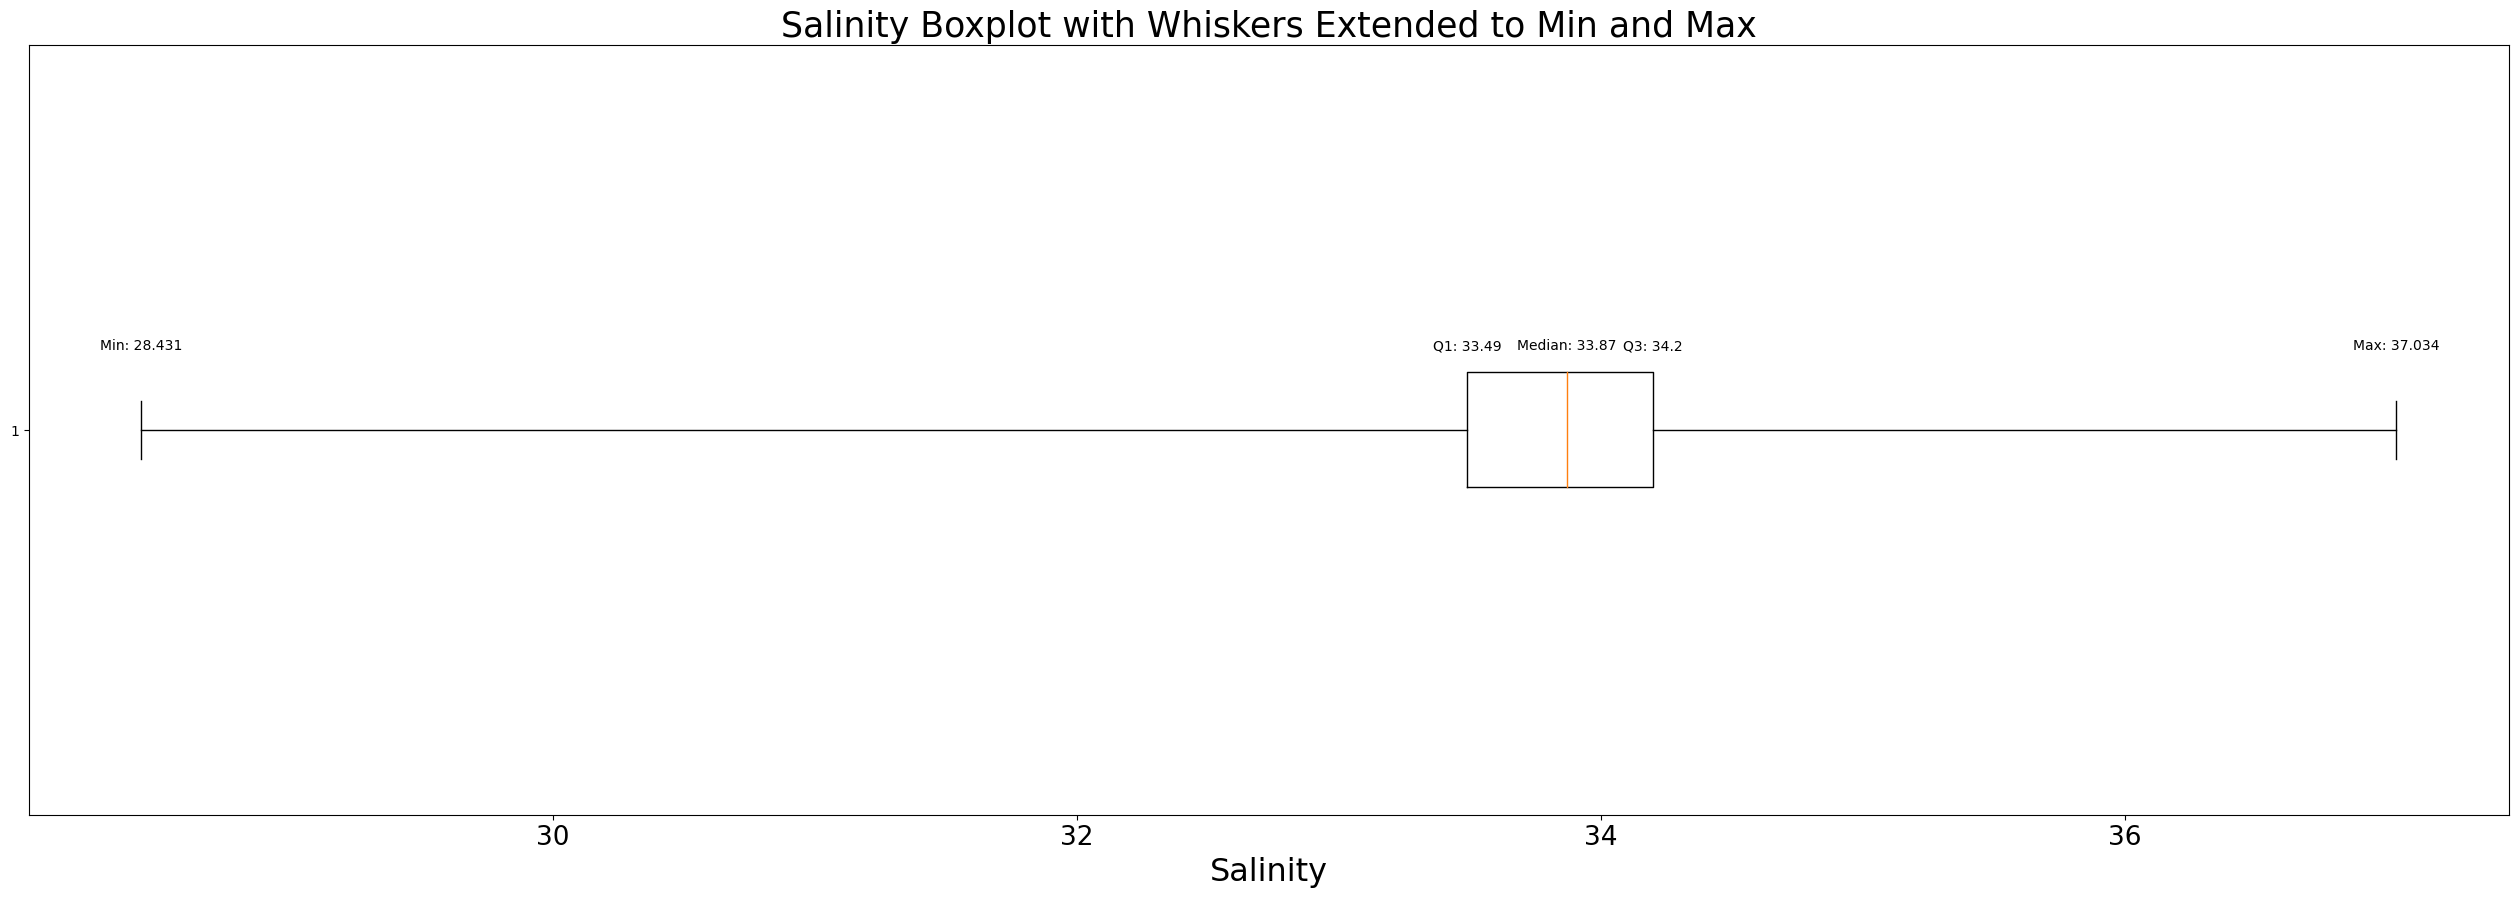

In [165]:
# median of Salinity
df.dropna(subset=['Salnty'], inplace=True)  # Remove rows with NaN in the 'T_degC' column
median_salinity = round(np.median(df['Salnty']),2)


# Q1 and Q3 of Salinity
Q1 = round(np.percentile(df['Salnty'],25),2)
Q3 = round(np.percentile(df['Salnty'],75),2)

# min and max
lowest = min(df['Salnty'])
highest = max(df['Salnty'])

range_temp = round((highest - lowest),3) # range
interquartile_range = round((Q3 - Q1), 2) # interquartile range

print('Interquartile Rrange: ' + str(interquartile_range), '\nRange: ' + str(range_temp), 
      '\nMedian: ' + str(median_salinity), '\nQ1: ' + str(Q1), '\nQ3: ' + str(Q3))

# Salinity Boxplot 
boxplot_data = [lowest, Q1, median_salinity, Q3, highest]

plt.figure(figsize=(32,10))

plt.boxplot(boxplot_data, vert=False, whis=range_temp) 
plt.title('Salinity Boxplot with Whiskers Extended to Min and Max',fontsize=25)
plt.xlabel('Salinity', fontsize=23)

for value, label in zip(boxplot_data, ['Min', 'Q1', 'Median', 'Q3', 'Max']):
    plt.text(value, 1.1, f'{label}: {value}', va='bottom', ha='center')

plt.xticks(fontsize=19)    
plt.show()

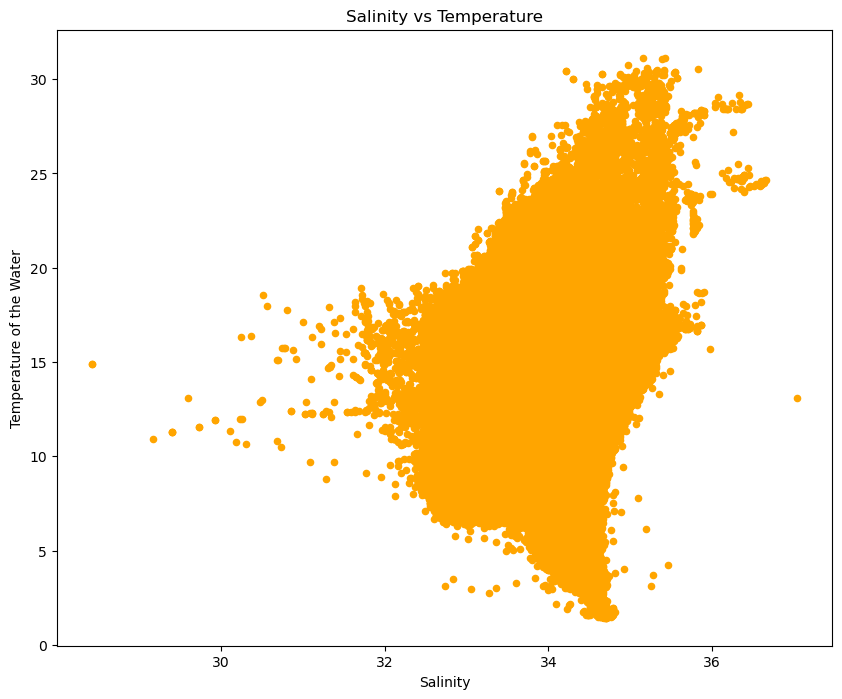

In [129]:
# Scatter plot of T_degC vs Salnty
plt.figure(figsize=(10,8))
plt.scatter(df['Salnty'], df['T_degC'], s=20, color='orange')
plt.xlabel('Salinity')
plt.ylabel('Temperature of the Water')
plt.title('Salinity vs Temperature')
plt.show()

In [183]:
# Handling missing values and duplicates
median_salnty = round(df['Salnty'].median(),3)
median_temp = round(df['T_degC'].median(),3)
df['Salnty'].fillna(median_salnty,inplace=True)
df['T_degC'].fillna(median_temp, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  814247 non-null  float64
 1   T_degC  814247 non-null  float64
dtypes: float64(2)
memory usage: 18.6 MB


In [340]:
# Random Sampling
population_size = 814247
sample_size = int(0.10 * population_size)  # 10% of the population size

# randomly select rows from df
random_sample = df.sample(n=sample_size, random_state=42)  

# subsample for linear dependency
subsample_size = 1000

# randomly select rows from random_sample
small_subsample = random_sample.sample(n=subsample_size, random_state=42)

# smaller subsample
small_subsample

small_subsample

# calculate IQR for Salnty and T_degC
Q1_Salnty = small_subsample['Salnty'].quantile(0.25)
Q3_Salnty = small_subsample['Salnty'].quantile(0.75)
IQR_Salnty = Q3_Salnty - Q1_Salnty

Q1_T_degC = small_subsample['T_degC'].quantile(0.25)
Q3_T_degC = small_subsample['T_degC'].quantile(0.75)
IQR_T_degC = Q3_T_degC - Q1_T_degC

# define lower and upper bounds for outliers
lower_bound_Salnty = Q1_Salnty - 0.3 * IQR_Salnty
upper_bound_Salnty = Q3_Salnty + 0.3 * IQR_Salnty

lower_bound_T_degC = Q1_T_degC - 0.3 * IQR_T_degC
upper_bound_T_degC = Q3_T_degC + 0.3 * IQR_T_degC

# filter out outliers
sample_without_outliers = small_subsample[
    (small_subsample['Salnty'] >= lower_bound_Salnty) &
    (small_subsample['Salnty'] <= upper_bound_Salnty) &
    (small_subsample['T_degC'] >= lower_bound_T_degC) &
    (small_subsample['T_degC'] <= upper_bound_T_degC)
]


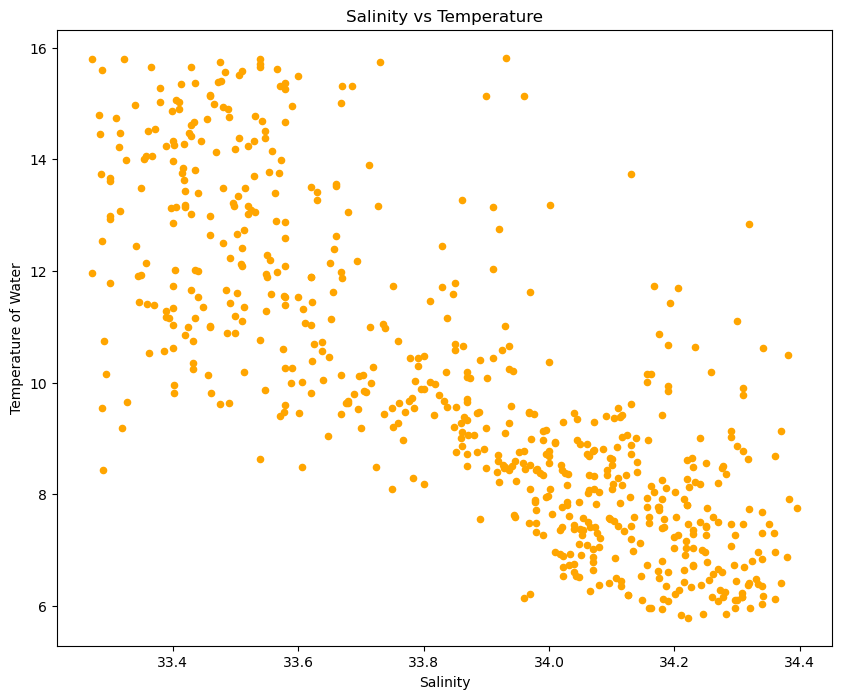

In [341]:
# sample_without_outliers linear dependency Slnty vs T_degC
plt.figure(figsize=(10, 8))
plt.scatter(sample_without_outliers['Salnty'], sample_without_outliers['T_degC'],s=20, color='orange')
plt.xlabel('Salinity')
plt.ylabel('Temperature of Water')
plt.title('Salinity vs Temperature')
plt.show()

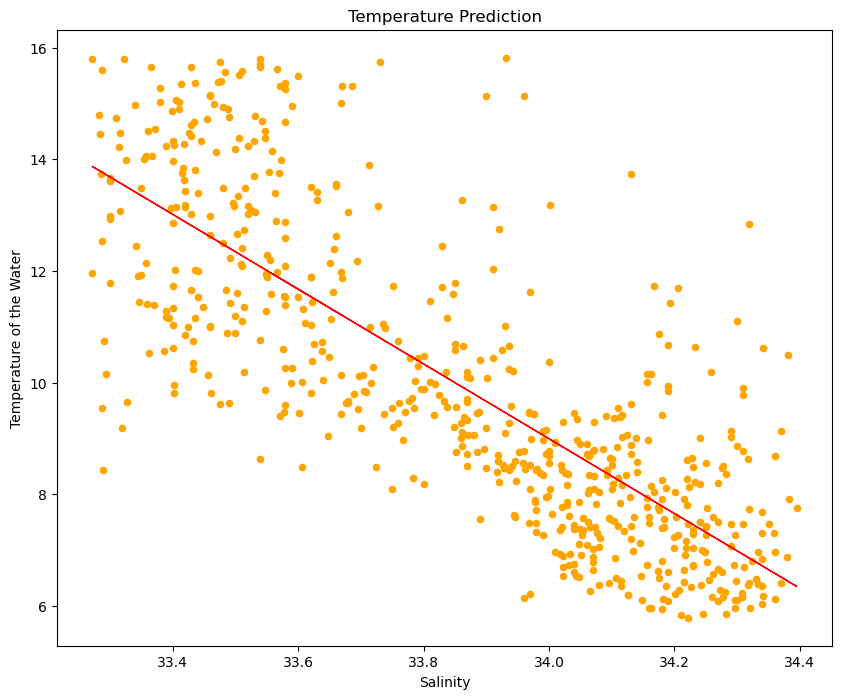

In [345]:
# Linear Regression
salinity = sample_without_outliers.iloc[:, 0:1].values 
temperature = sample_without_outliers.iloc[:, -1].values 

# fitting a line
regression = LinearRegression()
regression.fit(salinity,temperature)

# plotting
plt.figure(figsize=(10, 8))
plt.scatter(salinity,temperature, s=20, color='orange')
plt.plot(salinity,regression.predict(salinity), color='red', linewidth='1')
plt.xlabel('Salinity')
plt.ylabel('Temperature of the Water')
plt.title('Temperature Prediction')
plt.show()


In [346]:
# prediction of temperature given input of Salinity
temperature_pred = regression.predict([[33.6]])
temperature_pred

array([11.67602788])

In [344]:
# checking R^2 
temp = regression.predict(salinity)
print('R^2 score: ', r2_score(temperature,temp))

R^2 score:  0.6269557920414646
